<div style="color:navy; background-color:orange; font-size:16px;">Importing the dataset</div>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

<div style="color:navy; background-color:orange; font-size:16px;">Downloading the John Hopkins Covid 19 dataset</div>

In [2]:
#https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports
#!git clone https://github.com/CSSEGISandData/COVID-19.git

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv"
df = pd.read_csv(url, error_bad_lines = False)
US = df[df['Country_Region'] == "US"]
d = ['Admin2', 'FIPS', "Lat", "Long_", 'Case_Fatality_Ratio', 'Incident_Rate']
for to_be_deleted in d:
    del US[to_be_deleted]

In [4]:
np.unique(US['Last_Update'])

array(['2020-08-04 02:27:56', '2020-08-07 22:34:20',
       '2020-12-21 13:27:30', '2020-12-29 23:22:37',
       '2021-01-02 05:22:33', '2021-04-02 15:13:53'], dtype=object)

In [5]:
temp_data = US.groupby(by=["Province_State"]).sum().reset_index()

In [6]:
temp_data.head()

,Province_State,Confirmed,Deaths,Recovered,Active
0,Alabama,365747,4872,0,360875.0
1,Alaska,47019,206,0,46780.0
2,Arizona,530267,9015,0,521252.0
3,Arkansas,229442,3711,0,225731.0
4,California,2365024,26504,0,2309915.0


<div style="color:navy; background-color:orange; font-size:16px;">All existing dates</div>

In [7]:
#storing all dates
from datetime import date, timedelta

d1 = date(2020,1,22)
d2 = date(2021,5,18)

#list containing all of the dates
dates = [d1 + timedelta(days=x) for x in range((d2-d1).days + 1)]
all_dates = []
#all_dates[0].day, all_dates[0].month, all_dates[0].year
for d in dates:
    if d.day < 10:
        day = "0"+str(d.day)
    else:
        day = str(d.day)
    if d.month <10:
        month = "0"+str(d.month)
    else:
        month = str(d.month)
    year = str(d.year)
    #print(month+"-"+day+"-"+year)
    all_dates.append(month+"-"+day+"-"+year)    

In [8]:
#all_dates
#all_dates[0].day, all_dates[0].month, all_dates[0].year
#type(all_dates[0].day)

<div style="color:navy; background-color:orange; font-size:16px;">Downloading data corresponding to each particular date</div>

In [9]:
def store_df(index):
    """
    index in the all_dates
    """
    date = all_dates[index]
    url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/" + date + ".csv"
    df = pd.read_csv(url, error_bad_lines = False)
    return df
#store_df(123) #date = "01-12-2021" first index in the all_dates list

<div style="color:navy; background-color:orange; font-size:16px;">Cleaning and filtering the dataset</div>

In [10]:
dataset = store_df(60) #first recording for America is in the 60th day of recording
dataset[dataset['Country_Region']=='US'].groupby(by=["Province_State"]).sum().reset_index()[['Province_State', 'Confirmed','Deaths', 'Recovered', "Active"]].head()

,Province_State,Confirmed,Deaths,Recovered,Active
0,Alabama,180,0,0,0
1,Alaska,20,0,0,0
2,American Samoa,0,0,0,0
3,Arizona,152,2,0,0
4,Arkansas,165,0,0,0


In [11]:
def clean_df(index):
    dataset = store_df(index)
    try:
        res = dataset[dataset['Country_Region']=='US'].groupby(by=["Province_State"]).sum().reset_index()[['Province_State', 'Confirmed','Deaths', 'Recovered', "Active"]]
    except:
        print("No information for date")
    return res
clean_df(60).head()

,Province_State,Confirmed,Deaths,Recovered,Active
0,Alabama,180,0,0,0
1,Alaska,20,0,0,0
2,American Samoa,0,0,0,0
3,Arizona,152,2,0,0
4,Arkansas,165,0,0,0


<div style="color:navy; background-color:orange; font-size:16px;">Merging the data corresponding to each date</div>

In [12]:
result = clean_df(60)
result.columns = ['Province_State', 'C60', 'D60', 'R60', 'A60']
#for d in range(60, len(all_dates)):
for d in range(61, len(all_dates)):
    cols = result.columns
    t = clean_df(d)
    result = result.join(t.set_index('Province_State'), on='Province_State')
    result.columns = list(cols) + ["C"+str(d), "D"+str(d), "R"+str(d), "A"+str(d) ]
    if d%50 == 0:
        print("Merging --- {}%".format(np.round(100/len(all_dates)*d),2))

Merging --- 21.0%
Merging --- 31.0%
Merging --- 41.0%
Merging --- 52.0%
Merging --- 62.0%
Merging --- 72.0%
Merging --- 83.0%
Merging --- 93.0%


In [13]:
assert result.shape[1] == (len(all_dates)-60)*4 + 1

In [14]:
result.to_csv("CDAR.csv", sep='\t')

<div style="color:navy; background-color:orange; font-size:16px;">Confirmed cases</div>

In [15]:
Confirmed = ["C"+str(d) for d in range(60, len(all_dates))]
result[['Province_State'] + Confirmed]c

<div style="color:navy; background-color:orange; font-size:16px;">Death cases</div>

In [16]:
Death = ["D"+str(d) for d in range(60, len(all_dates))]
result[['Province_State'] + Death].to_csv("Death.csv", sep='\t')

<div style="color:navy; background-color:orange; font-size:16px;">Active cases</div>

In [17]:
Active = ["A"+str(d) for d in range(60, len(all_dates))]
result[['Province_State'] + Active].to_csv("Active.csv", sep='\t')

<div style="color:navy; background-color:orange; font-size:16px;">Recovered cases</div>

In [18]:
Recovered = ["R"+str(d) for d in range(60, len(all_dates))]
result[['Province_State'] + Recovered].to_csv("Recovered.csv", sep='\t')

<div style="color:navy; background-color:orange; font-size:16px;">The results for a particular state</div>

In [19]:
result[result.Province_State =="Iowa"]

,Province_State,C60,D60,R60,A60,C61,D61,R61,A61,C62,...,R480,A480,C481,D481,R481,A481,C482,D482,R482,A482
19,Iowa,90,0,0,0,105.0,0.0,0.0,0.0,124.0,...,0.0,0.0,369494.0,6006.0,0.0,0.0,369693.0,6013.0,0.0,0.0


In [20]:
California = result[result.Province_State =="California"]
NewYork = result[result.Province_State =="New York"]
California[['Province_State'] + Confirmed]

,Province_State,C60,C61,C62,C63,C64,C65,C66,C67,C68,...,C473,C474,C475,C476,C477,C478,C479,C480,C481,C482
5,California,1646,2108.0,2538.0,2998.0,3899.0,4657.0,5095.0,5852.0,7138.0,...,3758137.0,3760303.0,3761779.0,3763281.0,3764405.0,3767052.0,3768087.0,3768805.0,3769827.0,3771240.0


<div style="color:navy; background-color:orange; font-size:16px;">Plotting the results for a particular state (CA and NY)</div>

In [21]:
confirmed_cal = list(California[['Province_State'] + Confirmed].iloc[0])[1:]
confirmed_ny= list(NewYork[['Province_State'] + Confirmed].iloc[0])[1:]

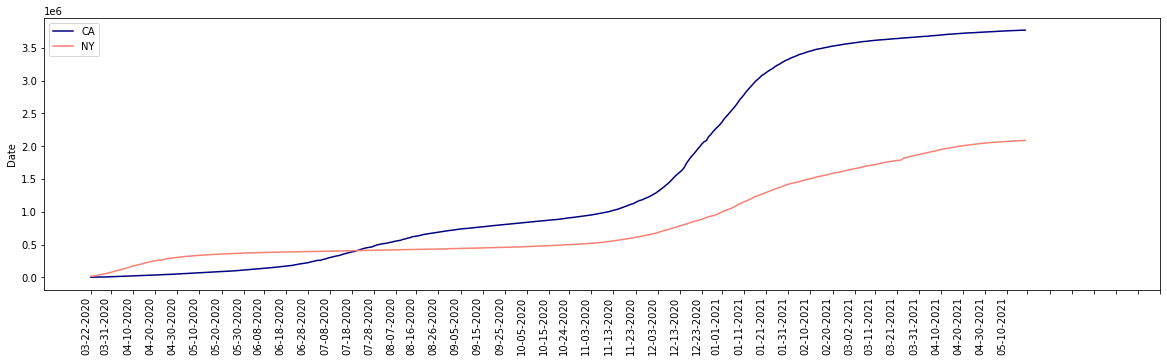

In [22]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.ylabel('#Confirmed', fontsize=10)
plt.ylabel('Date', fontsize=10)
plt.plot(all_dates[60:], confirmed_cal, color = "navy", label="CA")
plt.plot(all_dates[60:], confirmed_ny, color = "salmon", label="NY")
plt.xticks([int(i) for i in np.linspace(0, len(all_dates), 50)])
plt.legend(loc = "upper left")
plt.show()

<div style="color:blue; background-color:khaki; font-size:17px;">The above is aggregated data, in the following we store the data for singular days</div>

In [23]:
#daily = result.copy()
#cols = list(daily.columns)

In [24]:
#for r in range(daily.shape[0]):
    #for c in range(2, len(cols)):
       # daily[cols[c]].iloc[r]= daily[cols[c]].iloc[r] - daily[cols[c-1]].iloc[r]

<div style="color:navy; background-color:orange; font-size:16px;">Adding the vaccination data</div>

In [28]:
vaccination = pd.read_csv("../US_vacccination_timeseries.csv")
vaccination.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18
0,84000001.0,US,USA,840.0,1.0,NaN,Alabama,US,32.3182,-86.9023,...,2768204,2773615,2773902,2791631,2831853,2859591,2881314,2886106,2886153,2905553
1,84000002.0,US,USA,840.0,2.0,NaN,Alaska,US,61.3707,-152.4044,...,625950,575340,576572,596118,597901,600324,600324,600324,603937,605896
2,84000004.0,US,USA,840.0,4.0,NaN,Arizona,US,33.7298,-111.4312,...,5372605,5411726,5450531,5471165,5497137,5521396,5558091,5598339,5618126,5635242
3,84000005.0,US,USA,840.0,5.0,NaN,Arkansas,US,34.9697,-92.3731,...,1900002,1905274,1909885,1919251,1928682,1938998,1954605,1966843,1970379,1973505
4,84000006.0,US,USA,840.0,6.0,NaN,California,US,36.1162,-119.6816,...,33109680,33438134,33632769,33817290,34085597,34319950,34715312,35114882,35341738,35518035


In [29]:
for c in list(vaccination.columns)[:6]:
    del vaccination[c]

In [30]:
del vaccination['Combined_Key']
del vaccination['Country_Region']

In [31]:
vaccination = vaccination[vaccination['Province_State'].isin(list(result['Province_State']))]

In [32]:
vaccination.head()

,Province_State,Lat,Long_,Population,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,...,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18
0,Alabama,32.3182,-86.9023,4903185.0,NaN,NaN,NaN,NaN,5181.0,5181.0,...,2768204,2773615,2773902,2791631,2831853,2859591,2881314,2886106,2886153,2905553
1,Alaska,61.3707,-152.4044,731545.0,NaN,NaN,NaN,NaN,4270.0,4270.0,...,625950,575340,576572,596118,597901,600324,600324,600324,603937,605896
2,Arizona,33.7298,-111.4312,7278717.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5372605,5411726,5450531,5471165,5497137,5521396,5558091,5598339,5618126,5635242
3,Arkansas,34.9697,-92.3731,3017804.0,NaN,NaN,NaN,NaN,4000.0,4000.0,...,1900002,1905274,1909885,1919251,1928682,1938998,1954605,1966843,1970379,1973505
4,California,36.1162,-119.6816,39512223.0,NaN,NaN,NaN,NaN,NaN,NaN,...,33109680,33438134,33632769,33817290,34085597,34319950,34715312,35114882,35341738,35518035


In [33]:
vaccination = vaccination.fillna(0) #converting NaN values to 0

In [34]:
vaccine_cal = list(vaccination[vaccination['Province_State']=="California"].iloc[0])

In [35]:
daily_cal = confirmed_cal[0] +np.zeros(len(confirmed_cal))
for i in range(1, len(confirmed_cal)):
    daily_cal[i] = confirmed_cal[i] - confirmed_cal[i-1]

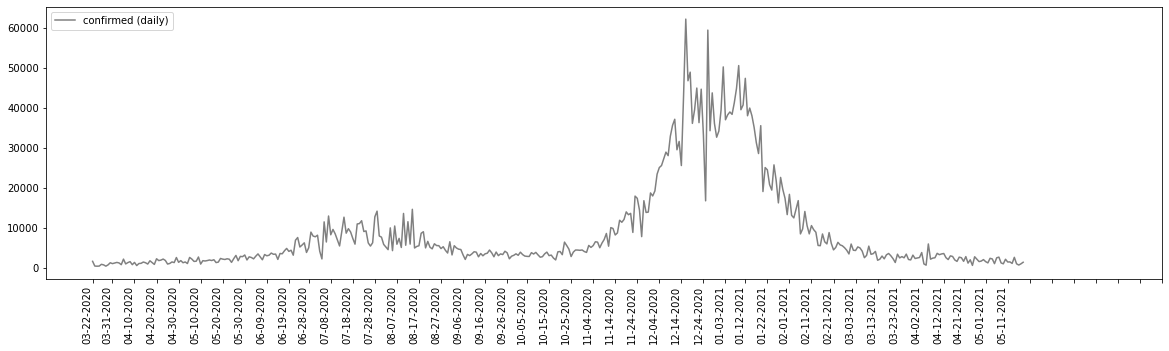

In [36]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90, ha='right', fontsize=10)
#plt.ylabel('#Confirmed', fontsize=10)
#plt.xlabel('date', fontsize=10)
#plt.plot(all_dates[60:], confirmed_cal, color = "navy", label="confirmed (agg)")
plt.plot(all_dates[60:], daily_cal, color = "gray", label="confirmed (daily)")
#plt.plot(all_dates[60:], [0]* (len(confirmed_cal)-len(vaccine_cal)+4) +vaccine_cal[4:], color = "salmon", label="vaccinated")
plt.xticks([int(i) for i in np.linspace(0, len(all_dates)+2, 50)])
plt.legend(loc = "upper left")
#plt.xticks("off")
#plt.yticks("off")
plt.show()

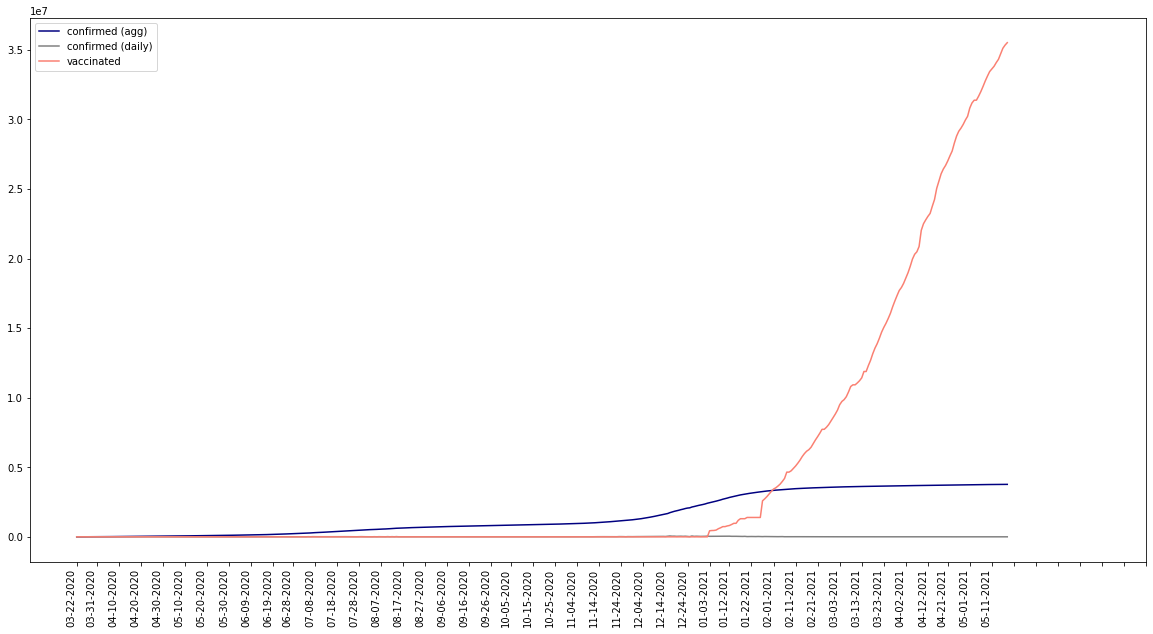

In [37]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90, ha='right', fontsize=10)
#plt.ylabel('#Confirmed', fontsize=10)
#plt.xlabel('date', fontsize=10)
plt.plot(all_dates[60:], confirmed_cal, color = "navy", label="confirmed (agg)")
plt.plot(all_dates[60:], daily_cal, color = "gray", label="confirmed (daily)")
plt.plot(all_dates[60:], [0]* (len(confirmed_cal)-len(vaccine_cal)+4) +vaccine_cal[4:], color = "salmon", label="vaccinated")
plt.xticks([int(i) for i in np.linspace(0, len(all_dates)+2, 50)])
plt.legend(loc = "upper left")
#plt.xticks("off")
#plt.yticks("off")
plt.show()

In [38]:
def plot_statistics_state(state="California"):
    plt.figure(figsize=(20, 5))
    plt.xticks(rotation=90, ha='right', fontsize=10)
    state_df = result[result.Province_State == state]
    confirmed_agg = list(state_df[['Province_State'] + Confirmed].iloc[0])[1:]
    confirmed_daily= confirmed_agg[0] +np.zeros(len(confirmed_agg))
    for i in range(1, len(confirmed_daily)):
        confirmed_daily[i] = confirmed_agg[i] - confirmed_agg[i-1]
    vaccinated =  list(vaccination[vaccination['Province_State']==state].iloc[0])
    plt.plot(all_dates[60:], confirmed_agg, color = "navy", label="confirmed (agg)")
    plt.plot(all_dates[60:], confirmed_daily, color = "salmon", label="confirmed (daily)")
    plt.plot(all_dates[60:], [0]* (len(confirmed_agg)-len(vaccinated)+4) +vaccinated[4:], color = "gold", label="vaccinated")
    plt.xticks([int(i) for i in np.linspace(0, len(all_dates)+2, 50)])
    plt.legend(loc = "upper left")
    #plt.xticks("off")
    #plt.yticks("off")
    plt.show()

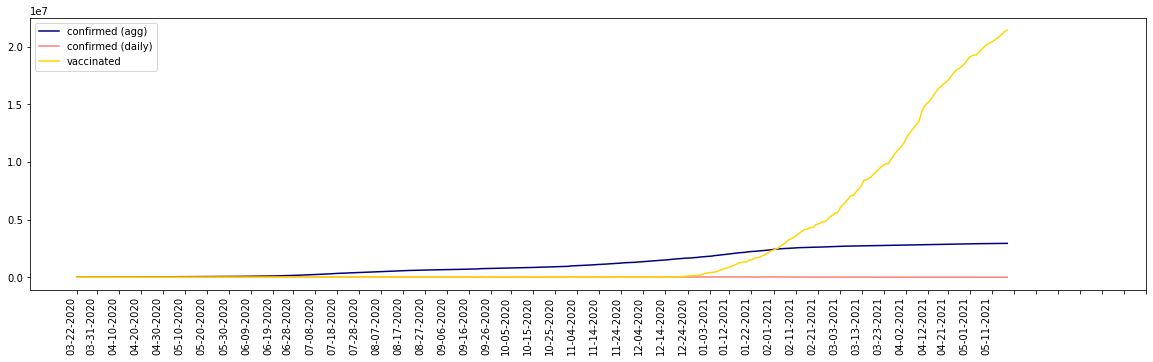

In [39]:
plot_statistics_state("Texas")

<div style="color:navy; background-color:orange; font-size:16px;">Prediction of number of vaccination (Vanila LSTM)</div>

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [403]:
v = vaccination[list(vaccination.columns)[4:]]
v.head()

,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,...,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18
0,0.0,0.0,0.0,0.0,5181.0,5181.0,5181.0,5181.0,5181.0,5181.0,...,2768204,2773615,2773902,2791631,2831853,2859591,2881314,2886106,2886153,2905553
1,0.0,0.0,0.0,0.0,4270.0,4270.0,5674.0,7118.0,8918.0,11002.0,...,625950,575340,576572,596118,597901,600324,600324,600324,603937,605896
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5372605,5411726,5450531,5471165,5497137,5521396,5558091,5598339,5618126,5635242
3,0.0,0.0,0.0,0.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,...,1900002,1905274,1909885,1919251,1928682,1938998,1954605,1966843,1970379,1973505
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33109680,33438134,33632769,33817290,34085597,34319950,34715312,35114882,35341738,35518035


In [301]:
# splitting the sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [411]:
 def predict_next_all_seq(index, sequence):
    n_steps = 3
    X, y = split_sequence(sequence, n_steps) #splitting into samples
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    # defineing the model
    model = Sequential()
    model.add(LSTM(200, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # fitting the  model
    model.fit(X, y, epochs=200, verbose=0)
    # demonstrate prediction
    x_input = array(list(v.iloc[index])[-4:-1])
    x_input = x_input.reshape((1, n_steps, n_features))
    prediction = model.predict(x_input, verbose=0)
    return int(prediction)

In [436]:
 def predict_next_after_vaccination_start(index, sequence, epochs):
    """
    omits the zero values
    """
    #sequence = list(v.iloc[index])[-10:-1]
    sequence = list(filter((0.0).__ne__, sequence))
    n_steps = 3
    X, y = split_sequence(sequence, n_steps) #splitting into samples
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    # defineing the model
    model = Sequential()
    model.add(LSTM(200, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # fitting the  model
    model.fit(X, y, epochs=epochs, verbose=0)
    # demonstrate prediction
    x_input = array(list(v.iloc[index])[-4:-1])
    x_input = x_input.reshape((1, n_steps, n_features))
    prediction = model.predict(x_input, verbose=0)
    return int(prediction)

In [457]:
import warnings
predictions_May_18_after_start = []

In [468]:
v.iloc[0]

2020-12-14          0.0
2020-12-15          0.0
2020-12-16          0.0
2020-12-17          0.0
2020-12-18       5181.0
                ...    
2021-05-14    2859591.0
2021-05-15    2881314.0
2021-05-16    2886106.0
2021-05-17    2886153.0
2021-05-18    2905553.0
Name: 0, Length: 156, dtype: float64

In [ ]:
for state in range(45, len(v)):
#for state in range(v.shape[0]):
    warnings.filterwarnings('ignore')
    print(vaccination['Province_State'].iloc[state])
    sequence = list(v.iloc[state])[:-1]
    predictions_May_18_after_start.append(predict_next_after_vaccination_start(state, sequence, 1000))

In [483]:
len(predictions_May_18_after_start)

56

In [495]:
T = list(v['2021-05-18'])
E = predictions_May_18_after_start
error = []

for i in range(len(predictions_May_18_after_start)):
    error.append((E[i]-T[i])/T[i]*100)
average_error = np.mean(error)
print("Average error is {} percent".format(average_error))

Average error is 1.6941913975720635 percent


In [502]:
pop = list(vaccination['Population'])
w = []
for i in range(len(predictions_May_18_after_start)):
    w.append(pop[i]*error[i])
weighted_error = sum(w)/sum(pop)
print("Weighted error (based on population) is {} percent".format(weighted_error))

Weighted error (based on population) is 1.8007538632866453 percent


<div style="color:navy; background-color:orange; font-size:16px;">Daily Confirmed Cases rather than accumulated ones</div>

In [45]:
def daily_confirmed_cases(state):
    """
    input is a state's name
    output is the daily confirmed cases for that state using the aggregated data
    """
    assert isinstance(state, str)
    State = result[result.Province_State ==state]
    confirmed_state = list(State[['Province_State'] + Confirmed].iloc[0])[1:]
    daily_state = confirmed_state[0] +np.zeros(len(confirmed_state))
    for i in range(1, len(confirmed_state)):
        daily_state[i] = confirmed_state[i] - confirmed_state[i-1]
    return daily_state

In [60]:
states_list = list(result.Province_State)
daily_all_states = [daily_confirmed_cases(states_list[i]) for i in range(len(states_list))]

In [66]:
result.shape, len(daily_all_states[0])

((59, 1693), 423)

In [81]:
daily_all_states[0][0], daily_all_states[1][0]

(180.0, 20.0)

In [98]:
daily_confirmed_cols = ["DailyConfirmed"+str(d) for d in range(60, len(all_dates))]

In [95]:
#[daily_confirmed_cols[day]]

['DailyConfirmed60']

In [100]:
for day in range(len(daily_confirmed_cols)):
    col_content = [daily_all_states[i][day] for i in range(result.shape[0])]
    result[daily_confirmed_cols[day]] = col_content

In [127]:
result[['Province_State'] + daily_confirmed_cols].to_csv("DailyConfirmed.csv")
df = pd.read_csv("DailyConfirmed.csv")
#df

In [131]:
Daily_Confirmed = pd.read_csv("DailyConfirmed.csv")
Daily_Confirmed = Daily_Confirmed.drop("Unnamed: 0", axis=1)
Daily_Confirmed.head()

,Province_State,DailyConfirmed60,DailyConfirmed61,DailyConfirmed62,DailyConfirmed63,DailyConfirmed64,DailyConfirmed65,DailyConfirmed66,DailyConfirmed67,DailyConfirmed68,...,DailyConfirmed473,DailyConfirmed474,DailyConfirmed475,DailyConfirmed476,DailyConfirmed477,DailyConfirmed478,DailyConfirmed479,DailyConfirmed480,DailyConfirmed481,DailyConfirmed482
0,Alabama,180.0,44.0,74.0,174.0,102.0,110.0,117.0,79.0,121.0,...,244.0,106.0,310.0,347.0,1144.0,4918.0,2016.0,254.0,184.0,336.0
1,Alaska,20.0,10.0,4.0,7.0,15.0,2.0,27.0,17.0,12.0,...,0.0,237.0,61.0,89.0,84.0,113.0,0.0,0.0,136.0,57.0
2,American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,152.0,83.0,91.0,75.0,107.0,157.0,108.0,146.0,238.0,...,448.0,642.0,683.0,469.0,544.0,854.0,474.0,482.0,468.0,619.0
4,Arkansas,165.0,27.0,27.0,61.0,55.0,46.0,28.0,17.0,47.0,...,95.0,76.0,233.0,224.0,192.0,250.0,202.0,95.0,67.0,313.0


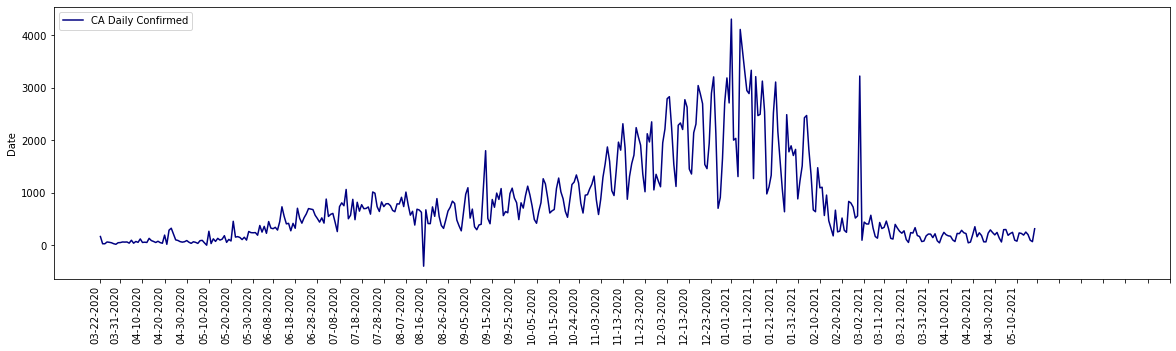

In [145]:
def plot_state_daily_confirmed(state):
    """
    given the state's name, plots the daily confirmed cases for that state
    """
    assert isinstance(state, str)
    california_daily_confirmed = list(Daily_Confirmed[Daily_Confirmed['Province_State']==state].iloc[0])[1:]

    plt.figure(figsize=(20, 5))
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.ylabel('#Confirmed', fontsize=10)
    plt.ylabel('Date', fontsize=10)
    plt.plot(all_dates[60:], california_daily_confirmed, color = "navy", label="CA Daily Confirmed")
    plt.xticks([int(i) for i in np.linspace(0, len(all_dates), 50)])
    plt.legend(loc = "upper left")
    plt.show()
plot_state_daily_confirmed("Arkansas")

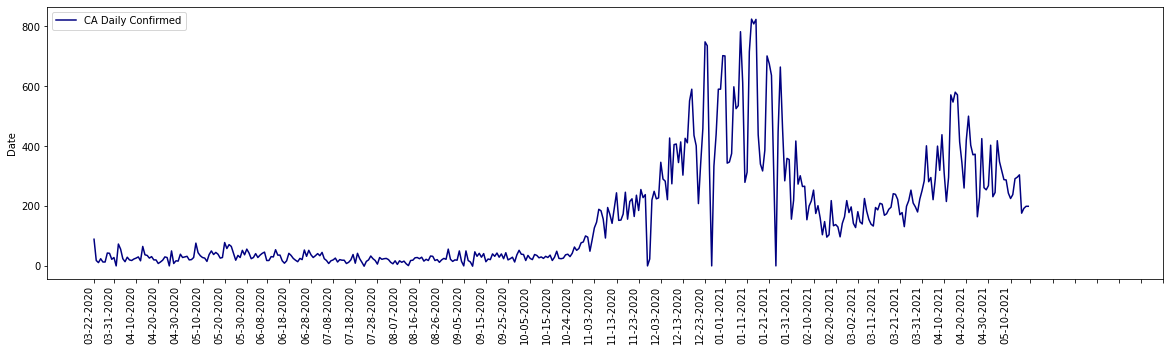

In [151]:
plot_state_daily_confirmed("Maine")

In [176]:
Daily_Confirmed.head()

,Province_State,DailyConfirmed60,DailyConfirmed61,DailyConfirmed62,DailyConfirmed63,DailyConfirmed64,DailyConfirmed65,DailyConfirmed66,DailyConfirmed67,DailyConfirmed68,...,DailyConfirmed473,DailyConfirmed474,DailyConfirmed475,DailyConfirmed476,DailyConfirmed477,DailyConfirmed478,DailyConfirmed479,DailyConfirmed480,DailyConfirmed481,DailyConfirmed482
0,Alabama,180.0,44.0,74.0,174.0,102.0,110.0,117.0,79.0,121.0,...,244.0,106.0,310.0,347.0,1144.0,4918.0,2016.0,254.0,184.0,336.0
1,Alaska,20.0,10.0,4.0,7.0,15.0,2.0,27.0,17.0,12.0,...,0.0,237.0,61.0,89.0,84.0,113.0,0.0,0.0,136.0,57.0
2,American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,152.0,83.0,91.0,75.0,107.0,157.0,108.0,146.0,238.0,...,448.0,642.0,683.0,469.0,544.0,854.0,474.0,482.0,468.0,619.0
4,Arkansas,165.0,27.0,27.0,61.0,55.0,46.0,28.0,17.0,47.0,...,95.0,76.0,233.0,224.0,192.0,250.0,202.0,95.0,67.0,313.0


<div style="color:khaki; background-color:navy; font-size:16px;">Note</div>for American Samoa there are no information. Also, I don't know why we have "Wuhan Evacuee" as one of US states. I need to check the validity of the above dataframe and these two states(?)
<br>These two states are also common in the general dataset so we might totally ignore them.
<br>About the validity, we compare some random subsequent data from the accumulated with the corresponding daily data.

In [170]:
result[['Province_State'] + daily_confirmed_cols].head()

,Province_State,DailyConfirmed60,DailyConfirmed61,DailyConfirmed62,DailyConfirmed63,DailyConfirmed64,DailyConfirmed65,DailyConfirmed66,DailyConfirmed67,DailyConfirmed68,...,DailyConfirmed473,DailyConfirmed474,DailyConfirmed475,DailyConfirmed476,DailyConfirmed477,DailyConfirmed478,DailyConfirmed479,DailyConfirmed480,DailyConfirmed481,DailyConfirmed482
0,Alabama,180.0,44.0,74.0,174.0,102.0,110.0,117.0,79.0,121.0,...,244.0,106.0,310.0,347.0,1144.0,4918.0,2016.0,254.0,184.0,336.0
1,Alaska,20.0,10.0,4.0,7.0,15.0,2.0,27.0,17.0,12.0,...,0.0,237.0,61.0,89.0,84.0,113.0,0.0,0.0,136.0,57.0
2,American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,152.0,83.0,91.0,75.0,107.0,157.0,108.0,146.0,238.0,...,448.0,642.0,683.0,469.0,544.0,854.0,474.0,482.0,468.0,619.0
4,Arkansas,165.0,27.0,27.0,61.0,55.0,46.0,28.0,17.0,47.0,...,95.0,76.0,233.0,224.0,192.0,250.0,202.0,95.0,67.0,313.0


In [175]:
result[['Province_State'] + Confirmed].head()

,Province_State,C60,C61,C62,C63,C64,C65,C66,C67,C68,...,C473,C474,C475,C476,C477,C478,C479,C480,C481,C482
0,Alabama,180,224.0,298.0,472.0,574.0,684.0,801.0,880.0,1001.0,...,530988.0,531094.0,531404.0,531751.0,532895.0,537813.0,539829.0,540083.0,540267.0,540603.0
1,Alaska,20,30.0,34.0,41.0,56.0,58.0,85.0,102.0,114.0,...,68880.0,69117.0,69178.0,69267.0,69351.0,69464.0,69464.0,69464.0,69600.0,69657.0
2,American Samoa,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,152,235.0,326.0,401.0,508.0,665.0,773.0,919.0,1157.0,...,868830.0,869472.0,870155.0,870624.0,871168.0,872022.0,872496.0,872978.0,873446.0,874065.0
4,Arkansas,165,192.0,219.0,280.0,335.0,381.0,409.0,426.0,473.0,...,337510.0,337586.0,337819.0,338043.0,338235.0,338485.0,338687.0,338782.0,338849.0,339162.0


<div style="color:navy; background-color:orange; font-size:16px;">Prediction of number of vaccination (other method)</div>

In [105]:
#future: do regression and compare with LSTM
#future: compare the results for different states
#future: check if datasets contain same states